## Exploratory Data Analysis

In [ ]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Read the restaurants csv file
restaurants = pd.read_csv("../files/paris_restaurants.csv")
print(restaurants)

In [ ]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o')
plt.show()

### Add a background map

In [ ]:
# Import contextily
import contextily
 
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

### Playing with `Geopandas`

In [ ]:
# Import GeoPandas
import geopandas as gpd
 
# Read the Paris districts dataset
districts = gpd.read_file('../files/paris_districts_utm.geojson')
 
# Inspect the first rows
print(districts.head())
 
# Make a quick visualization of the districts
districts.plot()
plt.show()

### Explore the districts of Paris

In [ ]:
# Check what kind of object districts is
print(type(districts))
 
# Check the type of the geometry attribute
print(type(districts.geometry))
 
# Inspect the first rows of the geometry
print(districts.geometry.head())
 
# Inspect the area of the districts
print(districts.geometry.area)

### The Magic: transforming csv to Geodataframe

In [ ]:
# Convert it to a GeoDataFrame
restaurants_shp = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.x, restaurants.y))
 
# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants_shp.head())
 
# Make a plot of the restaurants
ax = restaurants_shp.plot(markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

## Exploring and visualising spatial data

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  population_density  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...         1925.074371  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...        21793.281432  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        11679.793285  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        11302.915113  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...         7157.691434  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


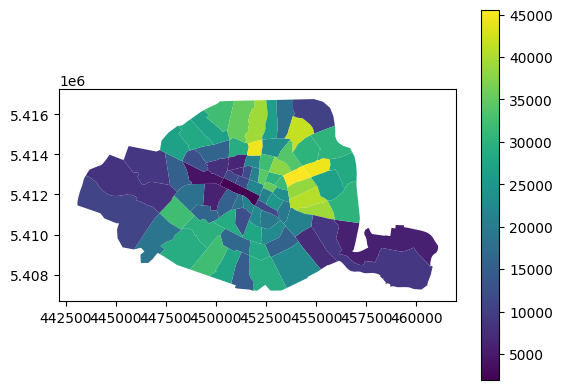

In [24]:
# Inspect the first rows of the districts dataset
print(districts.head())
 
# Inspect the area of the districts
print(districts.area)
 
# Add a population density column
districts['population_density'] = districts.population / districts.area * 10**6
 
# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

Name of the districts in Paris

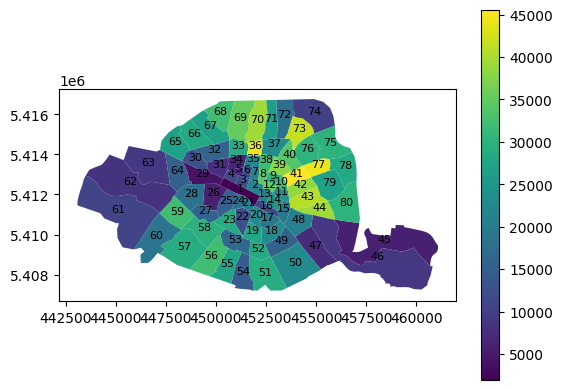

In [37]:
districts.plot(column='population_density', legend=True)

for idx, row in districts.iterrows():
    # Get the centroid of the district to place the label
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, str(row['id']), fontsize=8, ha='center')

plt.show()


## Group by

In [25]:
# Load the restaurants data: restaurants_shp 

# Calculate the number of restaurants of each type
type_counts = restaurants_shp.groupby('type').size()
 
# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


### Plotting multiple layers

Another typical pandas functionality is filtering a dataframe: taking a subset of the rows based on a condition (which generates a boolean mask).

In this exercise, we will take the subset of all African restaurants, and then make a multi-layered plot. In such a plot, we combine the visualization of several GeoDataFrames on a single figure. To add one layer, we can use the ax keyword of the plot() method of a GeoDataFrame to pass it a matplotlib axes object.

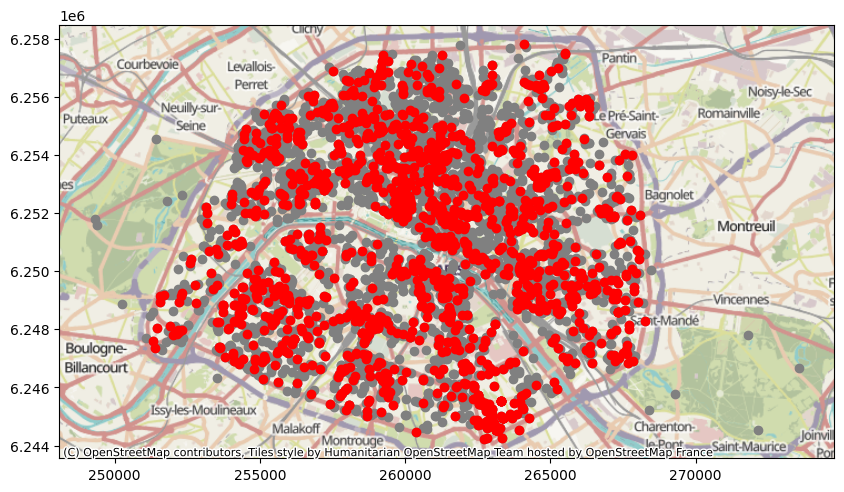

In [35]:
# Take a subset of the Asian restaurants
asian_restaurants = restaurants_shp[restaurants_shp['type'] == 'Asian restaurant']

# Create a multi-layered plot with specified size
fig, ax = plt.subplots(figsize=(10, 10))  # Adjusted size for clarity

# Plot all restaurants in grey
restaurants_shp.plot(color='grey', ax=ax)

# Plot Asian restaurants in red over the existing plot
asian_restaurants.plot(color='red', ax=ax)
#contextily.add_basemap(ax)

# Display the plot
plt.show()
